<a href="https://colab.research.google.com/github/abialbon/pytorch-udacity-scholarship/blob/master/PyTorch/My_first_PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing PyTorch in Google Drive

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


tcmalloc: large alloc 1073750016 bytes == 0x5778e000 @  0x7ff65bdb82a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


### Getting the MNIST datasets

In [2]:
import torch
from torchvision import transforms, datasets

# Getting the datasets
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


### Creating the model

In [0]:
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)


### Training the model

In [17]:
epochs = 5

for e in range(epochs):
  
  r_loss = 0
  for images, labels in trainLoader:
    optimizer.zero_grad()
    images = images.view(images.shape[0], 784)
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    r_loss += loss.item()
  else:
    print('Training loss: {}'.format(loss))

Training loss: 1.3096330165863037
Training loss: 0.5288078784942627
Training loss: 0.4853459298610687
Training loss: 0.4605860710144043
Training loss: 0.11457240581512451


### Testing the predictions

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch.nn.functional as F

def predictNumber(index):
  plt.imshow(images[index].view(28,28))
  predictions = F.softmax(model.forward(images[index].view(1, -1)), dim=1)
  predicted_num = (predictions == predictions.max()).nonzero()[0,1].item()
  print('The number predicted by the model is: {}'.format(predicted_num))

The number predicted by the model is: 1


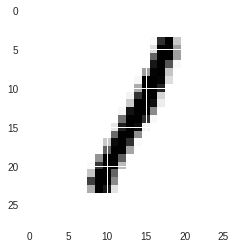

In [65]:
predictNumber(2)